# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

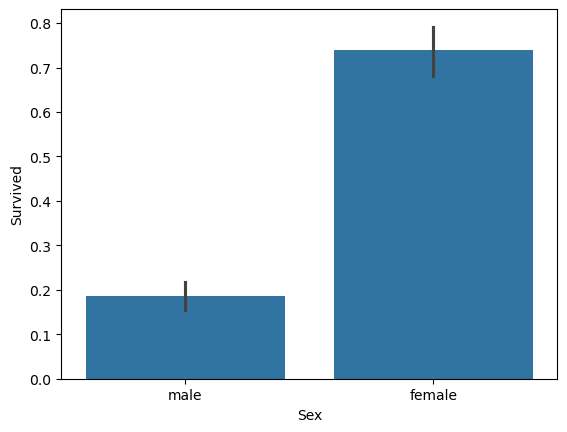

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers survived more.

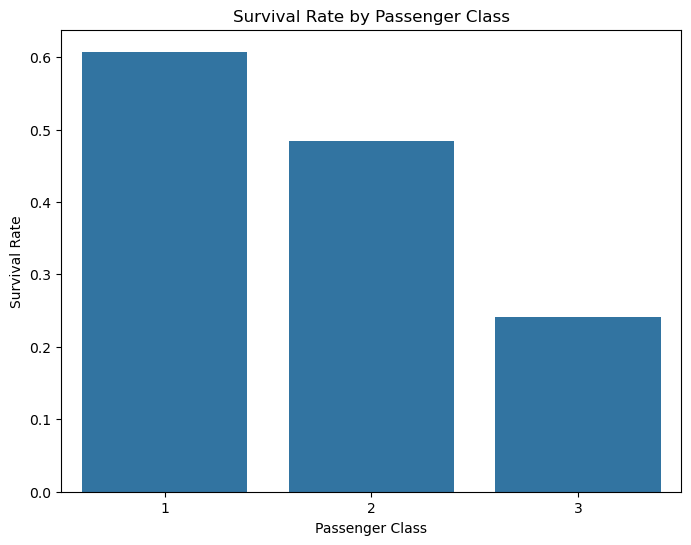

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
survival_by_class = data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8,6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes, survival is significantly related to embarked.

In [6]:
# Show the relevant statistics or visualization(s) to support your answer
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Survived'], data['Embarked'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 18.79846624282714
P-value: 8.278752920243535e-05


# Question 3: How is age related to survival?

Answer: Yes, children had higher survival rate than other age groups. 

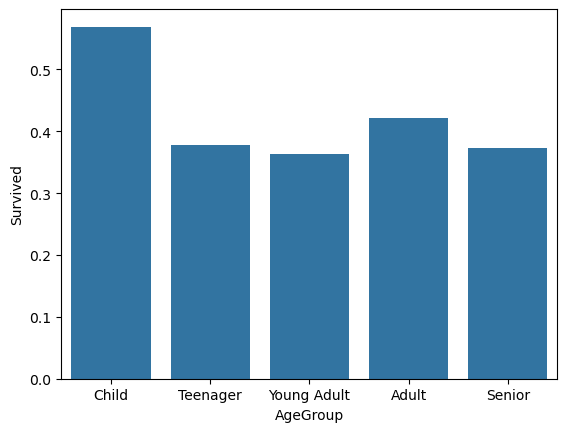

In [8]:
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
data['AgeGroup'].value_counts()
age_group_survival = data.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

ax = sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival)

# Question 4: Does family size somehow affect the survival rate?

Answer: Yes, there is higher survival rate if family size between 2 and 4.

   SibSp  Parch  FamilySize
0      0      0           1
1      0      0           1
2      0      0           1
3      1      0           2
4      4      2           7


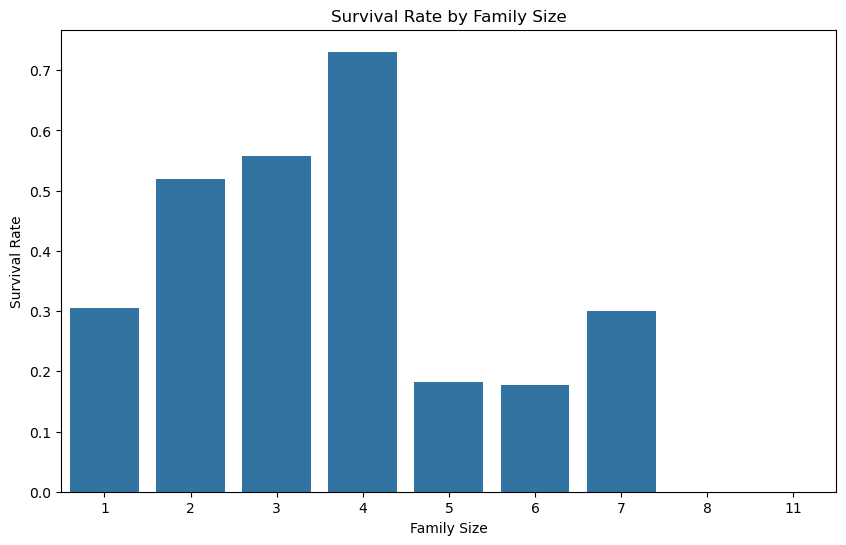

In [9]:
# Show the relevant statistics or visualization(s) to support your answer
# Create a new column 'FamilySize' as SibSp + Parch + 1 (including the passenger themselves)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Display the first few rows to confirm the new feature
print(data[['SibSp', 'Parch', 'FamilySize']].head())

# Group the data by Family Size and calculate the survival rate
survival_by_family_size = data.groupby('FamilySize')['Survived'].mean()

# Plot the survival rate by family size
plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_family_size.index, y=survival_by_family_size.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, noble and mrs had higher survival rate compared to the rest.

<Axes: xlabel='Title', ylabel='Survived'>

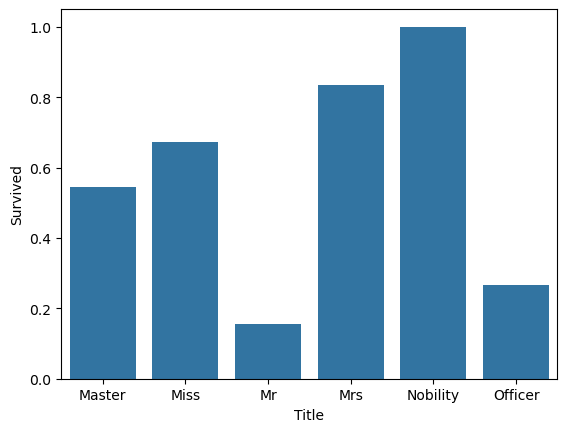

In [15]:
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

title_replacements = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Nobility',
    'Lady': 'Nobility',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer'
}

data['Title'] = data['Title'].replace(title_replacements)

title_survival = data.groupby('Title', observed=True)['Survived'].mean().reset_index()

sns.barplot(x='Title', y='Survived', data=title_survival)